# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install 'SQLAlchemy==1.4.46'

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 3.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 2.8 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     |█████

## Load data

In [33]:
import pandas as pd


csv_df = pd.read_sql_table('e_charging stations', 'sqlite:///AMSE_database.sqlite')
excel_df = pd.read_sql_table('e_ladesäulenregister', 'sqlite:///AMSE_database.sqlite')

### Look at the first rows

In [19]:
csv_df.head(10)

,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,p2_kw,p3_kw,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,koordinaten
0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,None,None,None,4.6,NaN,NaN,NaN,Landkreis BergstraÃe,Lorsch,64653,Klosterstr.,23,None,2017-01-02,"49.653064, 8.572109"
1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,None,None,22.0,50.0,NaN,NaN,Landkreis BergstraÃe,Lorsch,64653,NibelungenstraÃe,135-137,None,2021-04-27,"49.652969, 8.554764"
2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,FÃ¼rth,64658,Krumbacher Str.,39,None,2017-11-21,"49.658037, 8.787881"
3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,FÃ¼rth,64658,Erbacher Str.,102,a,2022-04-08,"49.66367, 8.79683"
4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,FÃ¼rth,64658,Schulstr.,12,None,2022-04-08,"49.64636, 8.78141"
5,Vogel AutohÃ¤user GmbH & Co. KG,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,Zwingenberg,64673,GieÃer Weg,16,None,2019-11-24,"49.722681, 8.602622"
6,Entega Plus GmbH,Schnellladeeinrichtung,2,150.0,DC Kupplung Combo,DC Kupplung Combo,None,None,150.0,150.0,NaN,NaN,Landkreis BergstraÃe,Einhausen,64683,In der Wolfshecke,1,None,2022-07-20,"49.663796, 8.543574"
7,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,Einhausen,64683,Friedensstr.,3,None,2022-09-15,"49.671588, 8.548023"
8,ALDI SÃD,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,Lautertal,64686,NibelungenstraÃe,349-351,None,2021-02-16,"49.711272, 8.703318"
9,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis BergstraÃe,Grasellenbach,64689,Am Kurpark,1,None,2017-07-31,"49.627596, 8.858623"


In [36]:
excel_df.head(10)

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,None,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,None,AC Steckdose Typ 2,22.0,None,None,NaN,None,None,NaN,None
1,smopi®,Albstraße,14,None,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,None,AC Steckdose Typ 2,22.0,None,AC Steckdose Typ 2,22.0,None,AC Steckdose Typ 2,22.0,None
2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,None,72589,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.510500,9.609000,...,None,AC Steckdose Typ 2,22.0,None,None,NaN,None,None,NaN,None
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,None,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.578534,9.874840,...,None,"DC Kupplung Combo, DC CHAdeMO",50.0,None,None,NaN,None,None,NaN,None
4,SWU Energie GmbH,Sterngasse,6,None,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,...,None,None,NaN,None,None,NaN,None,None,NaN,None
5,Physiotherapie im Stadtgarten,Lange Strasse,15,None,89129,Langenau,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.501099,10.122168,...,None,AC Schuko,3.7,None,None,NaN,None,None,NaN,None
6,Solarcollect,Eichlesstrasse,18,None,89129,Langenau,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.505686,10.138781,...,None,AC Schuko,3.7,None,None,NaN,None,None,NaN,None
7,EnBW mobility+ AG und Co.KG,Karlstr.,45,None,89129,Langenau,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.500374,10.117366,...,None,"AC Steckdose Typ 2, AC Schuko",22.0,None,None,NaN,None,None,NaN,None
8,EnBW mobility+ AG und Co.KG,Flurstück,313,None,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,None,DC Kupplung Combo,300.0,None,None,NaN,None,None,NaN,None
9,EnBW mobility+ AG und Co.KG,Flurstück,313,None,89129,Langenau/Seligweiler,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.456817,10.029649,...,None,DC Kupplung Combo,300.0,None,None,NaN,None,None,NaN,None


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [34]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   betreiber               36770 non-null  object 
 1   art_der_ladeeinrichung  36770 non-null  object 
 2   anzahl_ladepunkte       36770 non-null  int64  
 3   anschlussleistung       36770 non-null  float64
 4   steckertypen1           36770 non-null  object 
 5   steckertypen2           31111 non-null  object 
 6   steckertypen3           2233 non-null   object 
 7   steckertypen4           1132 non-null   object 
 8   p1_kw                   36770 non-null  float64
 9   p2_kw                   31129 non-null  float64
 10  p3_kw                   2233 non-null   float64
 11  p4_kw                   1131 non-null   float64
 12  kreis_kreisfreie_stadt  36770 non-null  object 
 13  ort                     36770 non-null  object 
 14  postleitzahl            36770 non-null

In [35]:
excel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42995 entries, 0 to 42994
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Betreiber               42995 non-null  object        
 1   Straße                  42995 non-null  object        
 2   Hausnummer              42995 non-null  object        
 3   Adresszusatz            6115 non-null   object        
 4   Postleitzahl            42995 non-null  int64         
 5   Ort                     42995 non-null  object        
 6   Bundesland              42995 non-null  object        
 7   Kreis/kreisfreie Stadt  42995 non-null  object        
 8   Breitengrad             42995 non-null  float64       
 9   Längengrad              42995 non-null  float64       
 10  Inbetriebnahmedatum     42995 non-null  datetime64[ns]
 11  Anschlussleistung       42995 non-null  float64       
 12  Art der Ladeeinrichung  42995 non-null  object

In [5]:
csv_df.groupby(["ort"]).count()

,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,p2_kw,p3_kw,p4_kw,kreis_kreisfreie_stadt,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,koordinaten
ort,,,,,,,,,,,,,,,,,,,
Aach,2,2,2,2,2,2,1,0,2,2,1,0,2,2,2,2,1,2,2
Aachen,131,131,131,131,131,125,6,0,131,125,6,0,131,131,131,131,8,131,131
Aachen-Brand,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1
Aachen-KÃ¶nigshÃ¼gel,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1
Aalen,23,23,23,23,23,22,3,2,23,22,3,2,23,23,23,23,3,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ãbach-Palenberg,4,4,4,4,4,4,1,0,4,4,1,0,4,4,4,4,0,4,4
Ãberherrn,3,3,3,3,3,2,0,0,3,2,0,0,3,3,3,3,0,3,3
Ãberlingen,24,24,24,24,24,19,0,0,24,19,0,0,24,24,24,24,1,24,24


In [6]:
excel_df.groupby(["ort"]).count()

KeyError: 'ort'

In [35]:
shared_columns = ['betreiber', 'strasse', 'hausnummer', 'postleitzahl', 'ort']
print("\nSummary statistics for shared columns:")
print("Mobilithek:")
print(csv_df[shared_columns].describe())
print("\nGovData:")
print(excel_df[shared_columns].describe())


Summary statistics for shared columns:
Mobilithek:
       postleitzahl
count  36770.000000
mean   54564.223117
std    27390.091752
min     1062.000000
25%    31137.000000
50%    56357.000000
75%    79117.000000
max    99991.000000

GovData:
       postleitzahl
count  42995.000000
mean   55027.560670
std    27239.516463
min     1062.000000
25%    31860.000000
50%    56727.000000
75%    79585.000000
max    99991.000000


/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.

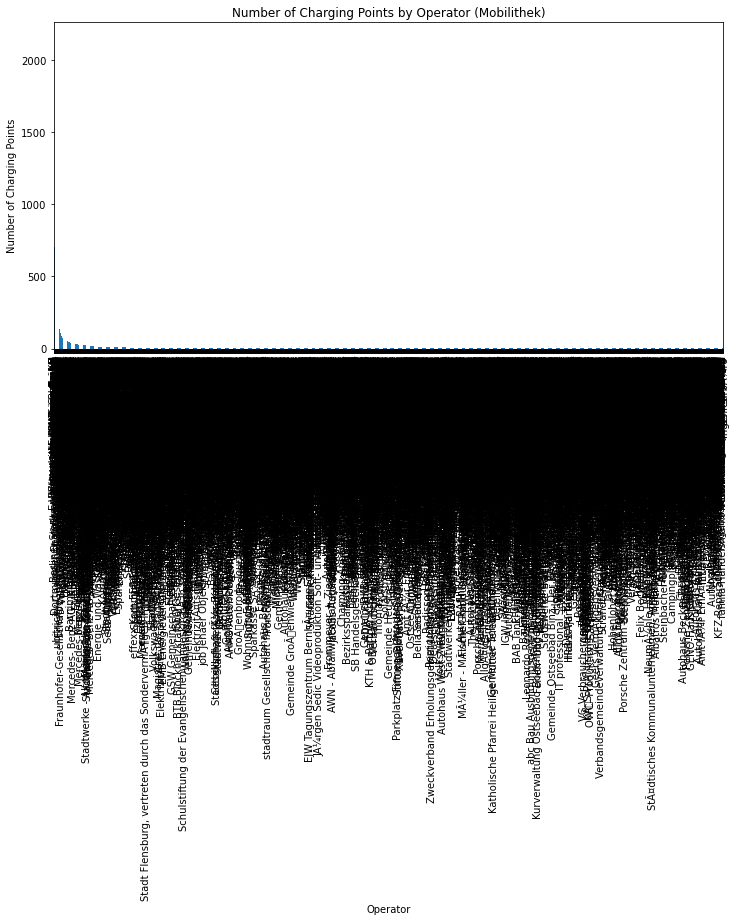

/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65286 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65286 missing from current font.
  font.set_text(s, 0, flags=flags)


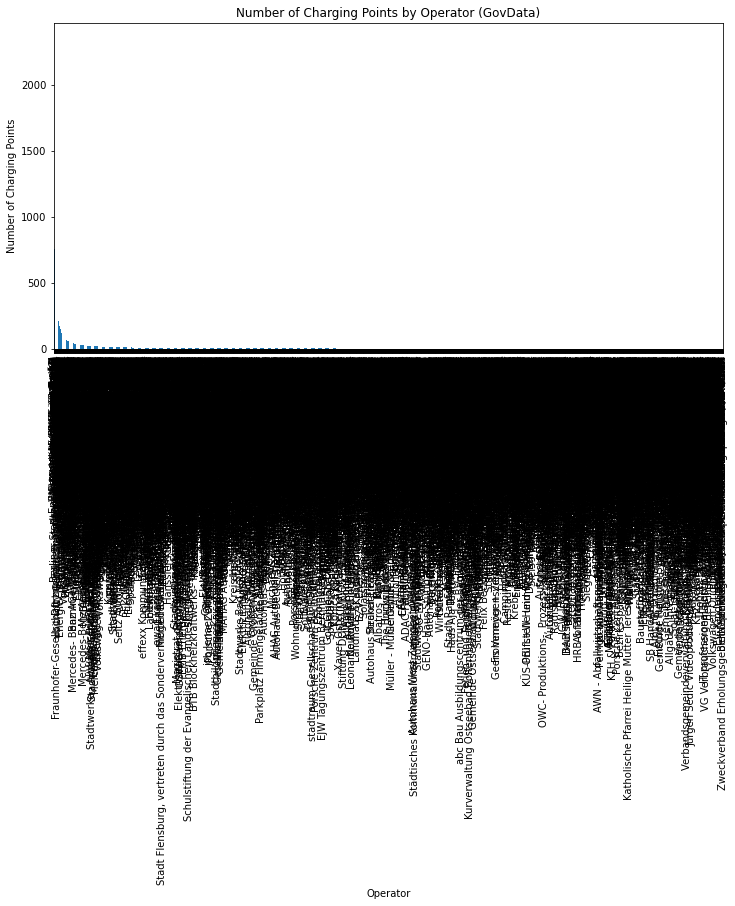

In [36]:
operator_counts_mobilithek = csv_df['betreiber'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
operator_counts_mobilithek.plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Number of Charging Points')
plt.title('Number of Charging Points by Operator (Mobilithek)')
plt.show()

# Bar plot of the number of charging points by operator in GovData
operator_counts_govdata = excel_df['betreiber'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
operator_counts_govdata.plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Number of Charging Points')
plt.title('Number of Charging Points by Operator (GovData)')
plt.show()

betreiber
17er Oberlandenergie                           46.0
1A Ladetechnik GmbH                             1.0
4XPRESS GmbH                                   14.0
A. Gotzen GmbH & CO KG                          2.0
A. Moksel GmbH                                  4.0
                                               ... 
Überlandwerk Leinetal GmbH                      0.0
Überlandwerk Rhön GmbH                          0.0
Überlandwerk Schäftersheim GmbH & Co. KG        0.0
Überlandzentrale Wörth/Isar Altheim Netz AG     0.0
Übernachten in der Tenne                        0.0
Name: anzahl_ladepunkte, Length: 5695, dtype: float64


/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chitraahuja/opt/anaconda3/lib/python3.

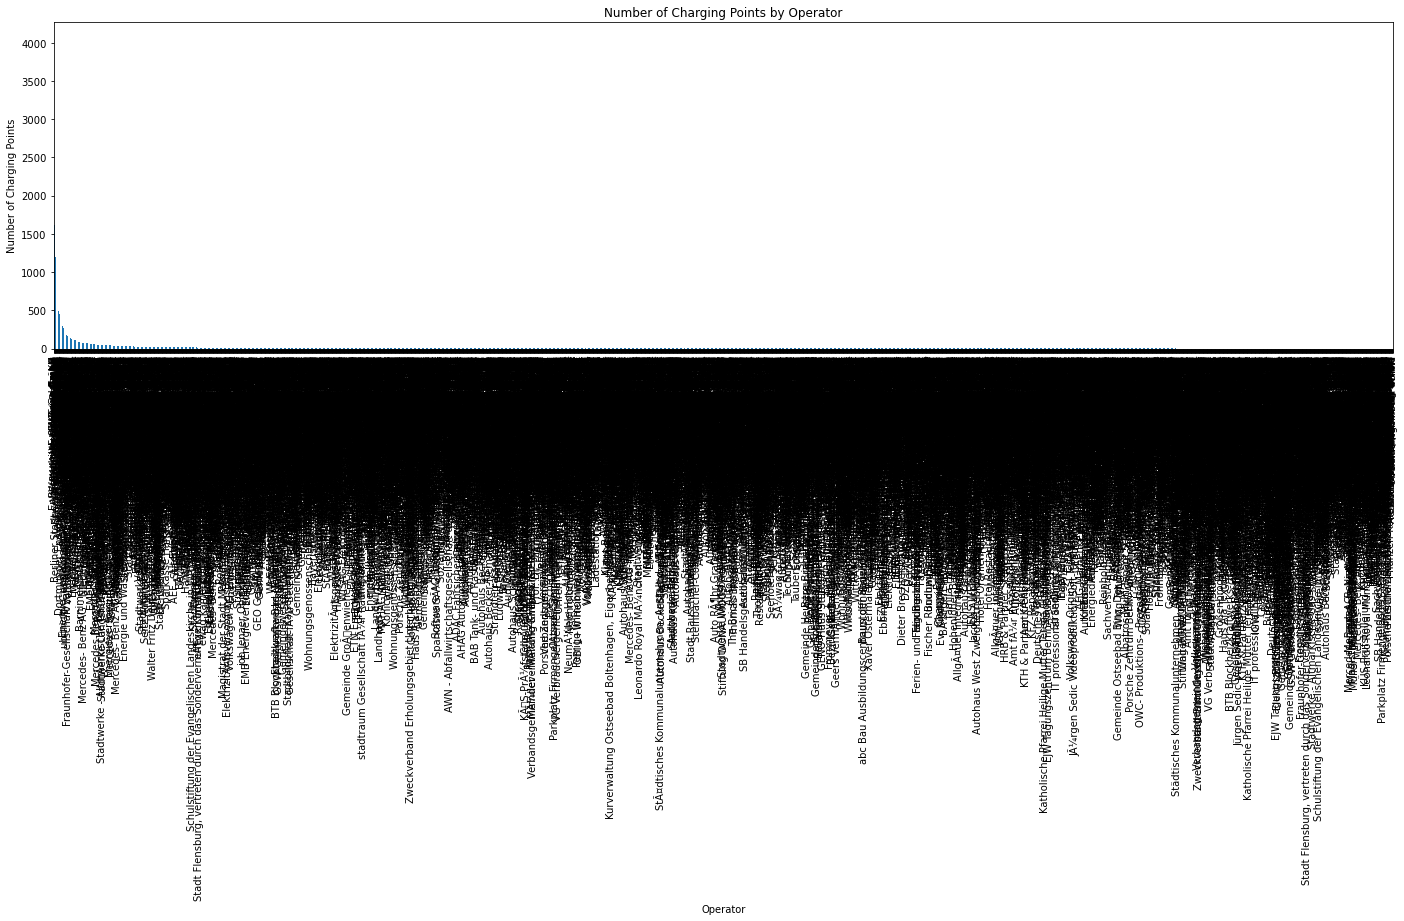

In [56]:
combined_data = pd.concat([csv_df, excel_df])
combined_data['betreiber'] = combined_data['betreiber'].str.strip()
combined_data.drop_duplicates()
combined_data.fillna(0)
# Calculate the number of charging points by operator
charging_points_by_operator = combined_data.groupby('betreiber')['anzahl_ladepunkte'].sum()

# Print the number of charging points by operator
print(charging_points_by_operator)

# Plot the number of charging points by operator
plt.figure(figsize=(24, 6))
charging_points_by_operator.sort_values(ascending=False).plot(kind='bar').grid(False)
plt.xlabel('Operator')
plt.ylabel('Number of Charging Points')
plt.title('Number of Charging Points by Operator')
plt.show()







In [2]:
pd.__version__

'1.3.4'